# Analisis Exploratorio de Datos (EDA)

### Importamos librerías

Estas librerías nos permiten manipular los datos y visualizarlos.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import langid
import sys
sys.path.insert(0, '../')
import Herramientas as Herr

### EDA de **australian_reviews**

#### Carga de datos

Lectura del archivo para su exploración.

In [29]:
data_reviews = pd.read_csv('../datasets/australian_reviews.csv',encoding='utf-8')
data_reviews

,user_id,user_url,posted,item_id,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011,1250,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,2014,251610,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,2014,248820,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,2013,250320,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,2014,211420,True,Git gud
...,...,...,...,...,...,...
59270,BonnieMTD,http://steamcommunity.com/id/BonnieMTD,2015,400,True,This is the best stratigy/puzzle game out ther...
59271,amillionlemons,http://steamcommunity.com/id/amillionlemons,2015,313120,True,Not a bad game for alpha. I think with future ...
59272,keepit1hunid,http://steamcommunity.com/id/keepit1hunid,2014,17410,True,Pretty great graphics and gameplay is no diffe...
59273,SKELETRONPRIMEISOP,http://steamcommunity.com/id/SKELETRONPRIMEISOP,2014,304930,True,This game is so much fun but so challenging it...


Se revisó que la exportación hecha previamente sea correcta.

In [30]:
Herr.analizar_datos(data_reviews)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,user_url,[<class 'str'>],100.0,0.0,0
2,posted,[<class 'int'>],100.0,0.0,0
3,item_id,[<class 'int'>],100.0,0.0,0
4,recommend,[<class 'bool'>],100.0,0.0,0
5,review,[<class 'str'>],100.0,0.0,0


Esta visualización de tipo "countplot"nos permite observar la cantidad de juegos publicados en cada año.

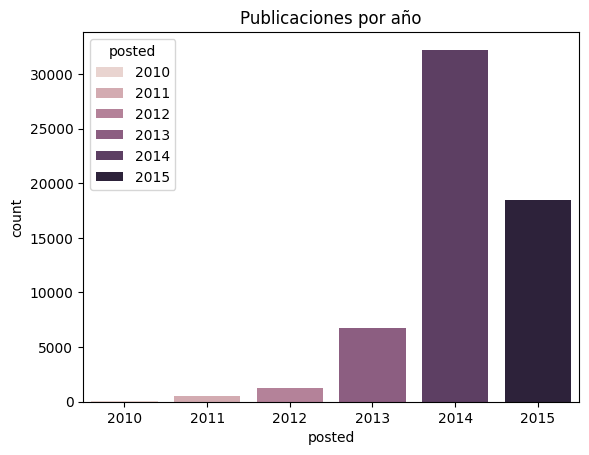

In [31]:
sns.countplot(data_reviews,x='posted',hue='posted')
plt.title("Publicaciones por año")
plt.show()

Se importó una función llamada "cantidad_porcentaje" del módulo Herramientas, la cual nos muestra en valores numéricos específicos las cantidades y cuánto representan del porcentaje total. En este caso, es de la columna "Posted".

In [32]:
Herr.cantidad_porcentaje(data_reviews,'posted')

Los valores de posted
2014    32214
2015    18462
2013     6786
2012     1215
2011      532
2010       66
El porcentaje de cada valor
2014    54.35
2015    31.15
2013    11.45
2012     2.05
2011     0.90
2010     0.11


Se analizaron la cantidad de comentarios según el idioma y, si es posible, se realizarán medidas.

In [33]:
contador_idiomas = {}

for resenia in data_reviews['review']:
    idioma,_ = langid.classify(resenia)
    contador_idiomas[idioma] = contador_idiomas.get(idioma,0) + 1

Hay una predominancia de los comentarios en inglés, pero al haber muchos otros comentarios en diferentes idiomas, no los borraremos ya que sí se considera que representan cantidades significativas.

In [34]:
contador_idiomas

{'en': 50497,
 'de': 342,
 'fr': 302,
 'es': 1211,
 'da': 205,
 'th': 712,
 'pt': 1800,
 'ru': 204,
 'lt': 77,
 'hi': 190,
 'zh': 322,
 'ko': 187,
 'no': 559,
 'wa': 85,
 'br': 30,
 'ne': 208,
 'km': 58,
 'af': 30,
 'sv': 153,
 'eu': 89,
 'nl': 367,
 'it': 327,
 'mk': 3,
 'sk': 51,
 'mr': 33,
 'an': 20,
 'nb': 17,
 'nn': 62,
 'la': 78,
 'pl': 199,
 'is': 12,
 'cs': 29,
 'cy': 45,
 'az': 10,
 'et': 75,
 'ka': 16,
 'ca': 19,
 'ja': 32,
 'ms': 20,
 'se': 2,
 'tl': 20,
 'id': 68,
 'mt': 60,
 'be': 3,
 'fi': 68,
 'xh': 9,
 'ro': 33,
 'sl': 49,
 'ur': 5,
 'tr': 32,
 'gl': 24,
 'eo': 22,
 'vi': 5,
 'rw': 6,
 'hy': 34,
 'hu': 22,
 'sr': 7,
 'sq': 6,
 'zu': 1,
 'am': 11,
 'bg': 9,
 'or': 1,
 'oc': 2,
 'ug': 5,
 'sw': 8,
 'mn': 5,
 'lv': 10,
 'uk': 3,
 'he': 3,
 'lo': 4,
 'hr': 8,
 'lb': 4,
 'kk': 9,
 'bs': 5,
 'bn': 3,
 'vo': 3,
 'qu': 4,
 'mg': 12,
 'ml': 1,
 'ga': 1,
 'ht': 4,
 'fo': 2,
 'fa': 1,
 'ar': 2,
 'ku': 1,
 'ky': 1,
 'jv': 1}

Se aplicó a la columna "reviews" una función de nuestro módulo Herramientas para realizar el análisis de sentimiento y dichos resultados se guardaron en una nueva columna llamada "sentiment_analysis". Se asignó 0 para los comentarios negativos, 1 para los neutrales y 2 para los positivos.

In [35]:
data_reviews['sentiment_analysis'] = data_reviews['review'].apply(Herr.analisis_sentimiento)

Se hizo el análisis de sentimiento y ahora se eliminó la columna "reviews" dado que ya tenemos los datos necesarios en formato numérico.

In [36]:
data_reviews = data_reviews.drop('review',axis=1)


Se realizó una revisión para ver los resultados del análisis de sentimientos. Se observa la última columna del DataFrame "data_reviews" con los cambios aplicados.

In [37]:
data_reviews

,user_id,user_url,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011,1250,True,1
1,js41637,http://steamcommunity.com/id/js41637,2014,251610,True,1
2,evcentric,http://steamcommunity.com/id/evcentric,2014,248820,True,1
3,doctr,http://steamcommunity.com/id/doctr,2013,250320,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,2014,211420,True,1
...,...,...,...,...,...,...
59270,BonnieMTD,http://steamcommunity.com/id/BonnieMTD,2015,400,True,2
59271,amillionlemons,http://steamcommunity.com/id/amillionlemons,2015,313120,True,1
59272,keepit1hunid,http://steamcommunity.com/id/keepit1hunid,2014,17410,True,2
59273,SKELETRONPRIMEISOP,http://steamcommunity.com/id/SKELETRONPRIMEISOP,2014,304930,True,1


En este grafico llamado "countplot" se puede visualizar la suma de las cantidades de cada valor en la columna "sentiment_analysis".   
Recordamos los valores: 
 * 0 = Negativo
 * 1 = Neutro
 * 2 = Positivo

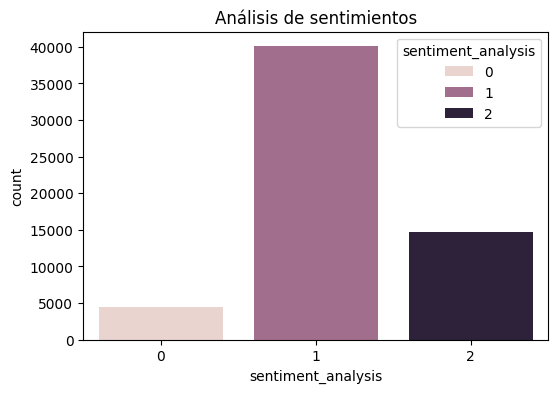

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data_reviews,x='sentiment_analysis',hue='sentiment_analysis')
plt.title("Análisis de sentimientos")
plt.show()

Se importó una función llamada "cantidad_porcentaje" del módulo Herramientas, la cual nos muestra en valores numéricos específicos las cantidades y cuánto representan del porcentaje total. En este caso, es de la columna "sentiment_analysis".

In [39]:
Herr.cantidad_porcentaje(data_reviews,'sentiment_analysis')

Los valores de sentiment_analysis
1    40086
2    14726
0     4463
El porcentaje de cada valor
1    67.63
2    24.84
0     7.53


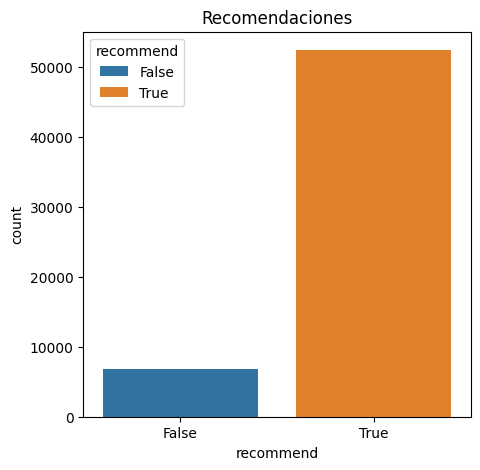

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(data_reviews,x='recommend',hue='recommend')
plt.title("Recomendaciones")
plt.show()

Nuevamente se importó una función llamada "cantidad_porcentaje" del módulo Herramientas, la cual nos muestra en valores numéricos específicos las cantidades y cuánto representan del porcentaje total. En este caso, es de la columna "recommend".

In [41]:
Herr.cantidad_porcentaje(data_reviews,'recommend')

Los valores de recommend
True     52446
False     6829
El porcentaje de cada valor
True     88.48
False    11.52


### EDA de **australian_items**

#### Carga de datos

Lectura del archivo para su exploración.

In [42]:
data_items = pd.read_csv('../datasets/australian_items.csv',encoding='utf-8')
data_items

,item_id,item_name,playtime_forever,user_id,items_count,steam_id
0,10,Counter-Strike,6.0,76561197970982479,277,76561197970982479
1,20,Team Fortress Classic,0.0,76561197970982479,277,76561197970982479
2,30,Day of Defeat,7.0,76561197970982479,277,76561197970982479
3,40,Deathmatch Classic,0.0,76561197970982479,277,76561197970982479
4,50,Half-Life: Opposing Force,0.0,76561197970982479,277,76561197970982479
...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0.0,76561198329548331,7,76561198329548331
5153205,373330,All Is Dust,0.0,76561198329548331,7,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3.0,76561198329548331,7,76561198329548331
5153207,521570,You Have 10 Seconds 2,4.0,76561198329548331,7,76561198329548331


Se normalizaron los nombres de los juegos para que, al momento de contabilizarlos, nos den los números reales.

Se revisó que la exportación hecha previamente sea correcta.

In [43]:
Herr.analizar_datos(data_items)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,item_id,[<class 'int'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'float'>],100.0,0.0,0
3,user_id,[<class 'str'>],100.0,0.0,0
4,items_count,[<class 'int'>],100.0,0.0,0
5,steam_id,[<class 'int'>],100.0,0.0,0


Se normalizaron todas las palabras de la columna "item_name" para que al utilizarlas más adelante en funciones o gráficos estén correctamente contabilizadas.

In [44]:
data_items['item_name'] = data_items['item_name'].str.title()
data_items

,item_id,item_name,playtime_forever,user_id,items_count,steam_id
0,10,Counter-Strike,6.0,76561197970982479,277,76561197970982479
1,20,Team Fortress Classic,0.0,76561197970982479,277,76561197970982479
2,30,Day Of Defeat,7.0,76561197970982479,277,76561197970982479
3,40,Deathmatch Classic,0.0,76561197970982479,277,76561197970982479
4,50,Half-Life: Opposing Force,0.0,76561197970982479,277,76561197970982479
...,...,...,...,...,...,...
5153204,346330,Brainbread 2,0.0,76561198329548331,7,76561198329548331
5153205,373330,All Is Dust,0.0,76561198329548331,7,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3.0,76561198329548331,7,76561198329548331
5153207,521570,You Have 10 Seconds 2,4.0,76561198329548331,7,76561198329548331


En este gráfico llamado "boxplot" se puede visualizar la distribución de los datos en la columna "playtime_forever".

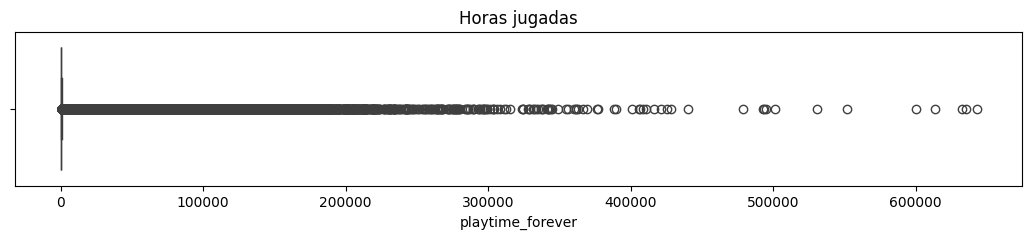

In [45]:
plt.figure(figsize=(13,2))
sns.boxplot(data_items,x='playtime_forever')
plt.title("Horas jugadas")
plt.show()

No se revisaron las demás variables dado que no hay nada que sea de interés; las columnas restantes son identificadores y nombres de juegos.

### EDA de outputs

#### Carga de datos

Lectura del archivo para su exploración.

In [17]:
data_output = pd.read_csv('../datasets/output.csv',encoding='utf-8')
data_output

,publisher,genres,app_name,title,release_date,price,early_access,item_id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
3,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
4,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,2018,4.99,False,761140,Kotoshiro
...,...,...,...,...,...,...,...,...,...
68053,Laush Studio,Indie,Russian Roads,Russian Roads,2018,1.99,False,610660,Laush Dmitriy Sergeevich
68054,Laush Studio,Racing,Russian Roads,Russian Roads,2018,1.99,False,610660,Laush Dmitriy Sergeevich
68055,Laush Studio,Simulation,Russian Roads,Russian Roads,2018,1.99,False,610660,Laush Dmitriy Sergeevich
68056,SIXNAILS,Casual,EXIT 2 - Directions,EXIT 2 - Directions,2017,4.99,False,658870,"xropi,stev3ns"


Se revisó que la exportación hecha previamente sea correcta.

In [18]:
Herr.analizar_datos(data_output)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,publisher,[<class 'str'>],100.0,0.0,0
1,genres,[<class 'str'>],100.0,0.0,0
2,app_name,[<class 'str'>],100.0,0.0,0
3,title,[<class 'str'>],100.0,0.0,0
4,release_date,[<class 'str'>],100.0,0.0,0
5,price,[<class 'float'>],100.0,0.0,0
6,early_access,[<class 'bool'>],100.0,0.0,0
7,item_id,[<class 'int'>],100.0,0.0,0
8,developer,[<class 'str'>],100.0,0.0,0


Se rellenaron los nulos que encontramos en el archivo que exportamos con "No data" en la columna "Publisher".

In [19]:
data_output['publisher'] = data_output['publisher'].fillna('No data')

Se normalizaron todas las palabras de las columnas "app_name","developer","genres","publisher,"title" para que al utilizarlas más adelante en funciones o gráficos estén correctamente contabilizadas.

data_output['app_name'] = data_output['app_name'].str.title()
data_output['developer'] = data_output['developer'].str.title()
data_output['genres'] = data_output['genres'].str.title()
data_output['publisher'] = data_output['publisher'].str.title()
data_output['title'] = data_output['title'].str.title()

En el siguiente gráfico de tipo "barplot" se observa que están las 10 empresas con mayor cantidad de publicaciones. Otro dato a observar es que NO tenemos información de muchos juegos publicados.

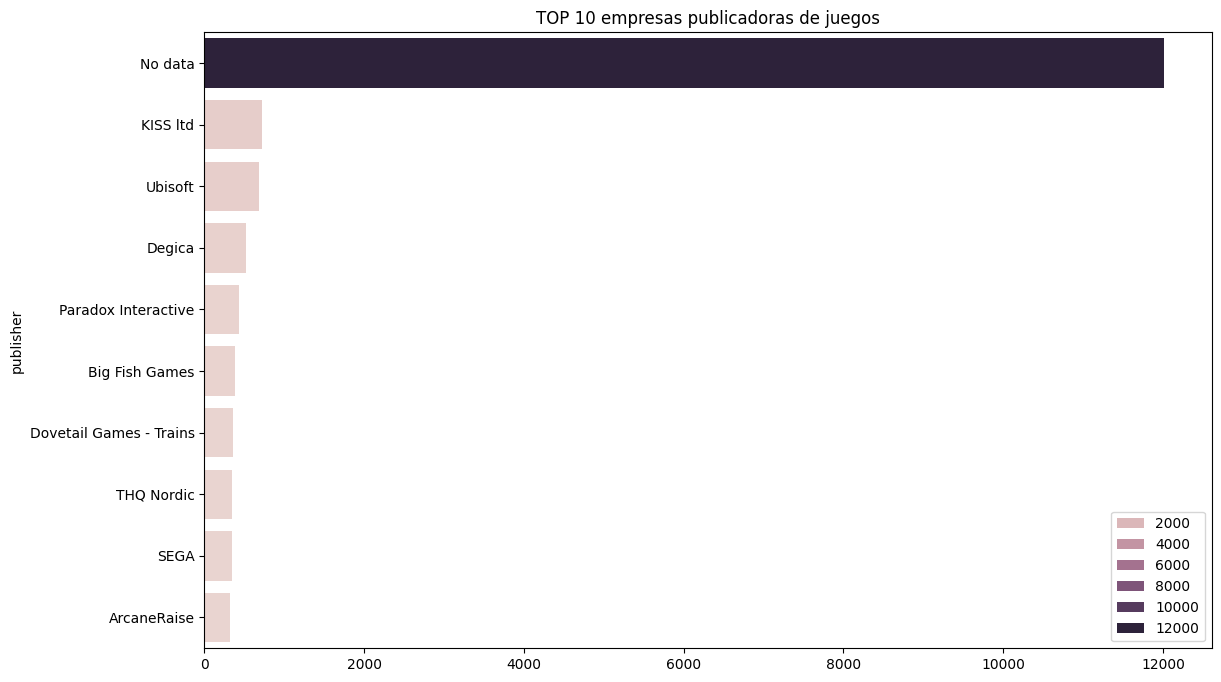

In [20]:
contador_publisher = data_output['publisher'].value_counts()
top10_publisher = contador_publisher.head(10)
plt.figure(figsize=(13,8))
sns.barplot(x=top10_publisher.values,y=top10_publisher.index,hue=top10_publisher.values)
plt.title("TOP 10 empresas publicadoras de juegos")
plt.show()

En el siguiente gráfico de tipo "barplot" se observan los géneros de juegos, destacando el género Indie y el de Acción.  
Se puede ver que tenemos nombres como Free to play o Early Access que no deberian estar alli, deben ser eliminados.

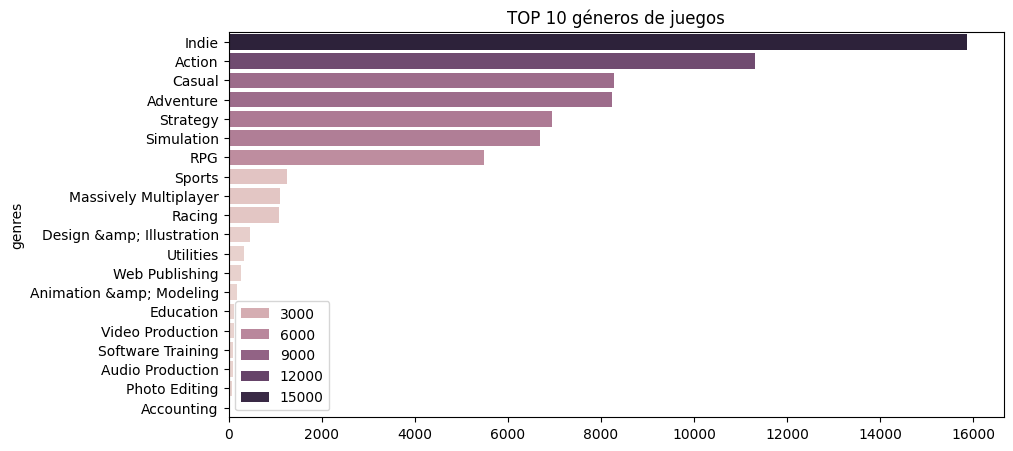

In [21]:
contador_genres = data_output['genres'].value_counts()
top10_genres = contador_genres
plt.figure(figsize=(10,5))
sns.barplot(x=top10_genres.values,y=top10_genres.index,hue=top10_genres.values)
plt.title("TOP 10 géneros de juegos")
plt.show()


Se quitaron los géneros que no correspondian. 

In [22]:
genres_quit = ['Free to Play','Early Access']
data_output = data_output[~data_output['genres'].isin(genres_quit)]
data_output = data_output.reset_index(drop=True)

En el siguiente gráfico de tipo "barplot" se observan los años de lanzamientos de los juegos. Se observa que el año 2017 predomina con más de 5 juegos de diferencia con respecto al año 2016.

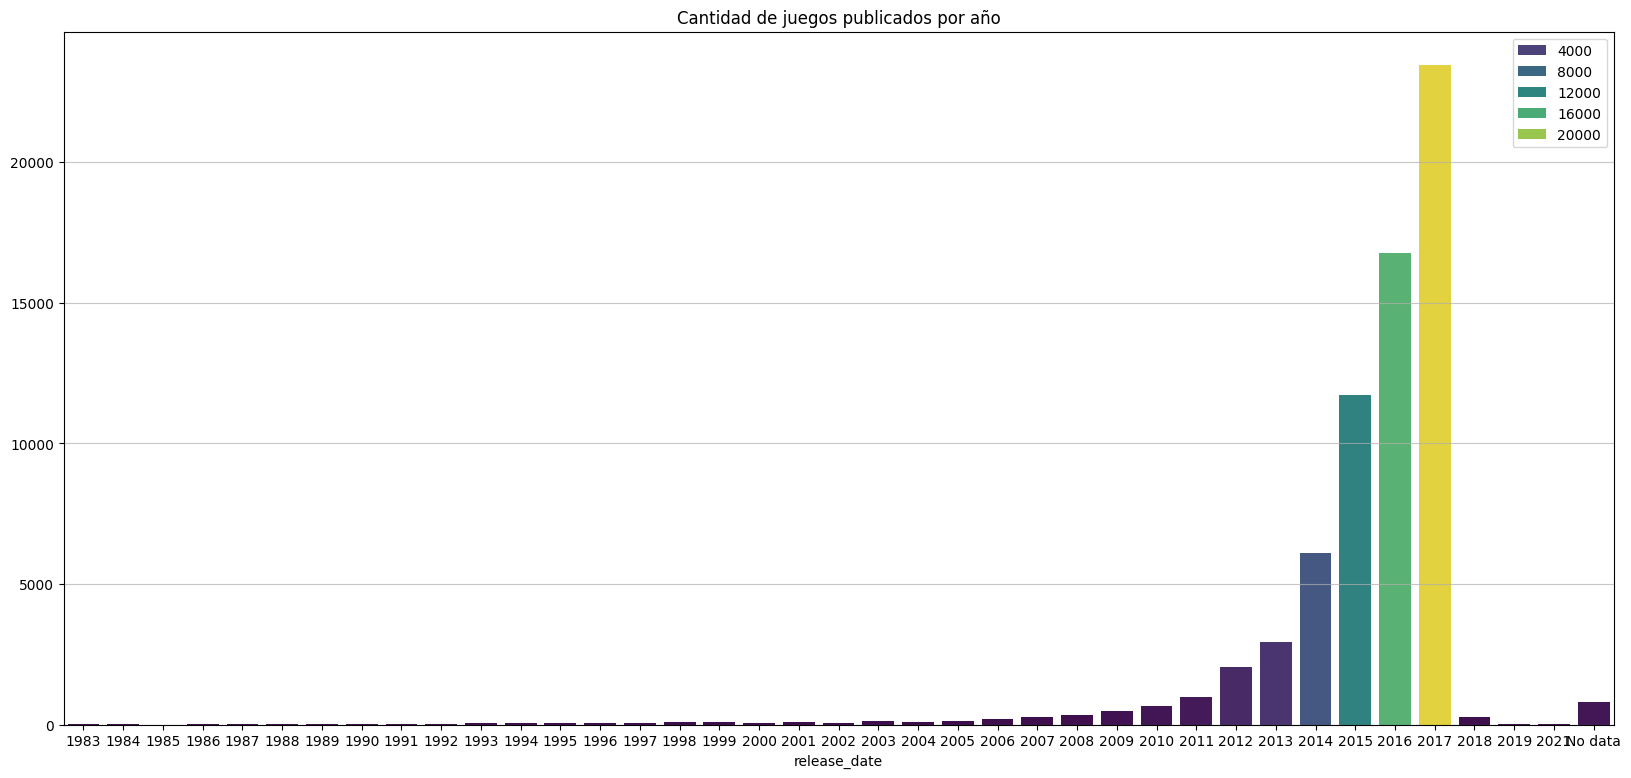

In [23]:
contador_date = data_output['release_date'].value_counts().sort_index()
plt.figure(figsize=(20,9))
sns.barplot(y=contador_date.values,x=contador_date.index,hue=contador_date.values,palette='viridis')
plt.grid(True,axis='y',linestyle='-',alpha=0.7)
plt.title("Cantidad de juegos publicados por año")
plt.show()

Se visualiza que en nuestro gráfico de tipo "boxplot", tenemos muchos "outliers", que no necesariamente lo son. Es posible que algunos juegos valgan más de la media, que es de 8 dólares, dependiendo de la ubicación geográfica, demanda y otros factores.

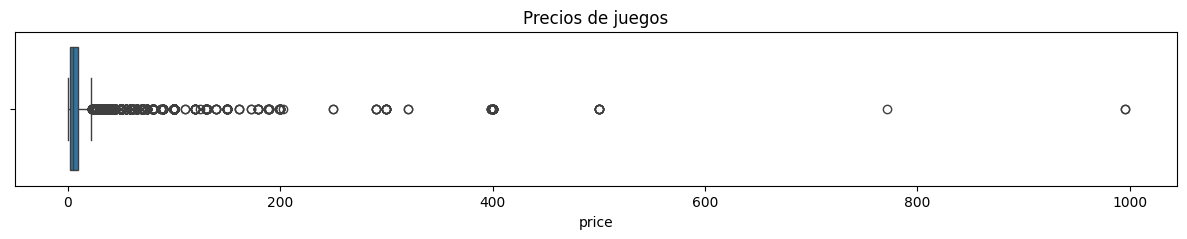

In [24]:
plt.figure(figsize=(15,2))
sns.boxplot(data_output,x='price')
plt.title("Precios de juegos")
plt.show()

En este gráfico llamado "countplot" se puede visualizar las cantidades de juegos que tienen acceso temprano o no en la plataforma, en la columna "early_access".

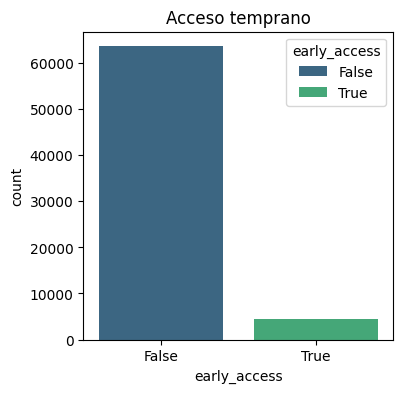

In [25]:
plt.figure(figsize=(4,4))
sns.countplot(data_output,x='early_access',hue='early_access',palette='viridis')
plt.title("Acceso temprano")
plt.show()

En el siguiente gráfico de tipo "barplot" se observan los 10 desarrolladores de juegos más destacados, predominando Ubisoft y seguido por SmiteWorks.

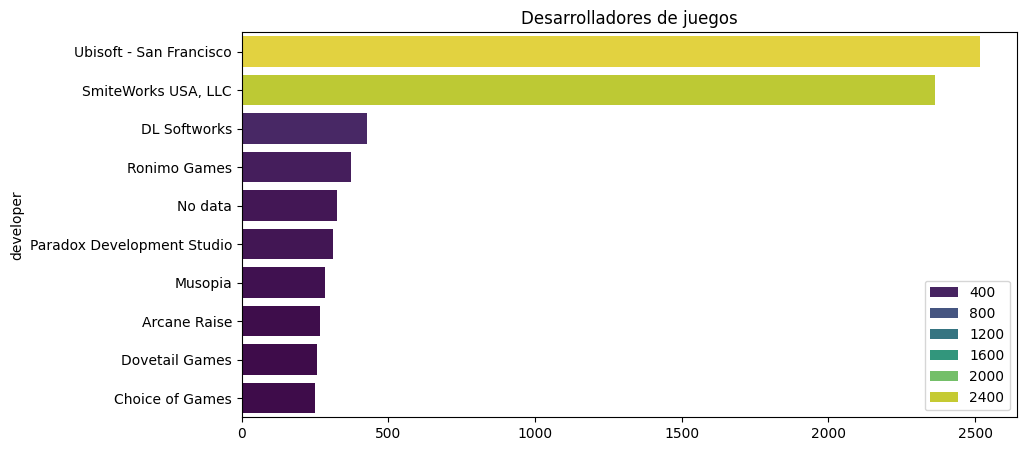

In [26]:
contador_developer = data_output['developer'].value_counts()
top10_developer = contador_developer.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10_developer.values,y=top10_developer.index,hue=top10_developer.values,palette='viridis')
plt.title("Desarrolladores de juegos")
plt.show()


In [28]:
data_output['app_name'] = data_output['app_name'].str.title()
data_output['developer'] = data_output['developer'].str.title()
data_output['genres'] = data_output['genres'].str.title()
data_output['publisher'] = data_output['publisher'].str.title()
data_output['title'] = data_output['title'].str.title()

Se exporta nuevamente el DataFrame de reviews y el DataFrame de output dado que se agregaron y eliminaron columnas.

### Exportamos los datos

A través de una función de nuestro módulo Herramientas, exportamos el archivo transformado.

In [29]:
Herr.export_data_csv('../datasets/australian_reviews_listo.csv',data_reviews)
Herr.export_data_csv('../datasets/output.csv',data_output)

NameError: name 'data_reviews' is not defined